# Real World Image Classification with Intel Image Classification Dataset

In this notebook, I will use the Intel Image Classification dataset to classify images into 6 different classes. The dataset contains 14,034 images of size 150x150 pixels. The classes are: buildings, forest, glacier, mountain, sea, and street. The dataset is available on [Kaggle](https://www.kaggle.com/puneet6060/intel-image-classification).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the data archive/seg_train/seg_train
current_dir = os.getcwd()
TRAINING_DIR = os.path.join(current_dir, 'archive/seg_train/seg_train')
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = os.path.join(current_dir, 'archive/seg_test/seg_test')
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=16,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Add a callback to stop training when the accuracy is 95%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [6]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 123s 139ms/step - accuracy: 0.5494 - loss: 1.1328 - val_accuracy: 0.7473 - val_loss: 0.7142
Epoch 2/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 138s 157ms/step - accuracy: 0.7528 - loss: 0.6694 - val_accuracy: 0.7800 - val_loss: 0.6091
Epoch 3/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 123s 140ms/step - accuracy: 0.8209 - loss: 0.4957 - val_accuracy: 0.7820 - val_loss: 0.5905
Epoch 4/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 120s 137ms/step - accuracy: 0.8643 - loss: 0.3766 - val_accuracy: 0.7557 - val_loss: 0.6806
Epoch 5/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 121s 138ms/step - accuracy: 0.8950 - loss: 0.2939 - val_accuracy: 0.8113 - val_loss: 0.5972
Epoch 6/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 133s 151ms/step - accuracy: 0.9205 - loss: 0.2218 - val_accuracy: 0.8117 - val_loss: 0.5956
Epoch 7/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 120s 137ms/step - accuracy: 0.9372 - loss: 0.1802 - val_accuracy: 0.8020 - val_loss: 0.7330
Epoch 8/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 126s 143ms/step - accuracy: 0.9503 -

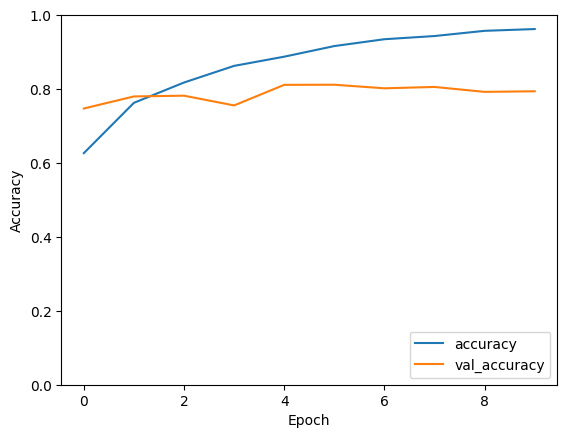

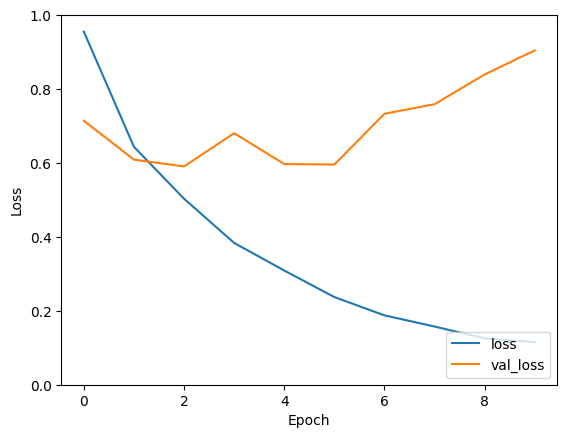

In [7]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


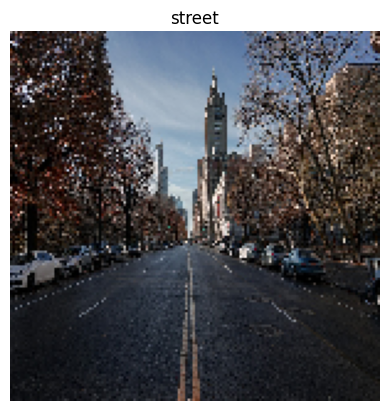

In [8]:
# Allow the user to input an image to classify using directory path

# Load the image
image_path = input('Enter the path to the image you want to classify: ') 

image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
input_arr = input_arr / 255.0

# Make a prediction
# show the image without axis
# map the prediction to the class
predictions = model.predict(input_arr)
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
plt.axis('off')
plt.title(classes[np.argmax(predictions)])
plt.imshow(image)
plt.show()